In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##### importing data

In [2]:
df=pd.read_csv(r"C:\Users\Administrator\Desktop\Excel Tutioral\New Datasets\Food Demand Forecasting Challenge\Train.csv")
df1=pd.read_csv(r"C:\Users\Administrator\Desktop\Excel Tutioral\New Datasets\Food Demand Forecasting Challenge\Test.csv")
meal=pd.read_csv(r"C:\Users\Administrator\Desktop\Excel Tutioral\New Datasets\Food Demand Forecasting Challenge\meal_info.csv")
center=pd.read_csv(r"C:\Users\Administrator\Desktop\Excel Tutioral\New Datasets\Food Demand Forecasting Challenge\fulfilment_center_info.csv")

In [3]:
df.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


In [4]:
df.describe()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
count,4.565480e+05,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.00000,456548.000000
mean,1.250096e+06,74.768771,82.105796,2024.337458,332.238933,354.156627,0.081152,0.10920,261.872760
std,1.443548e+05,41.524956,45.975046,547.420920,152.939723,160.715914,0.273069,0.31189,395.922798
min,1.000000e+06,1.000000,10.000000,1062.000000,2.970000,55.350000,0.000000,0.00000,13.000000
25%,1.124999e+06,39.000000,43.000000,1558.000000,228.950000,243.500000,0.000000,0.00000,54.000000
50%,1.250184e+06,76.000000,76.000000,1993.000000,296.820000,310.460000,0.000000,0.00000,136.000000
75%,1.375140e+06,111.000000,110.000000,2539.000000,445.230000,458.870000,0.000000,0.00000,324.000000
max,1.499999e+06,145.000000,186.000000,2956.000000,866.270000,866.270000,1.000000,1.00000,24299.000000


#### checking missing values in each column

In [5]:
df.isnull().sum()

id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
num_orders               0
dtype: int64

#### <font color="brown">derving new metric called month,year,Quarter from the week</font>

In [6]:
df['Month'] = df['week'].apply(lambda x: int(x / 4)+1)
df['Year'] = df['week'].apply(lambda x: int(x / 52)+1)
df['Quarter'] = df['week'].apply(lambda x: int(x / 13)+1)

In [7]:
df.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,Month,Year,Quarter
0,1379560,1,55,1885,136.83,152.29,0,0,177,1,1,1
1,1466964,1,55,1993,136.83,135.83,0,0,270,1,1,1
2,1346989,1,55,2539,134.86,135.86,0,0,189,1,1,1
3,1338232,1,55,2139,339.50,437.53,0,0,54,1,1,1
4,1448490,1,55,2631,243.50,242.50,0,0,40,1,1,1


In [8]:
df1['Month'] = df1['week'].apply(lambda x: int(x / 4)+1)
df1['Year'] = df1['week'].apply(lambda x: int(x / 52)+1)
df1['Quarter'] = df1['week'].apply(lambda x: int(x / 13)+1)

##### deriving new metrics ration based on checkout price and base price

In [9]:
df.loc[df['checkout_price'] < df['base_price'], 'C'] = 1
df.loc[df['checkout_price'] > df['base_price'], 'C'] = 2
df.loc[df['checkout_price'] == df['base_price'], 'C'] = 0

In [10]:
df1.loc[df1['checkout_price'] < df1['base_price'], 'C'] = 1
df1.loc[df1['checkout_price'] > df1['base_price'], 'C'] = 2
df1.loc[df1['checkout_price'] == df1['base_price'], 'C'] = 0

In [11]:
df['ratio']=df['checkout_price']/df['base_price']
df1['ratio']=df1['checkout_price']/df1['base_price']

In [12]:
df['ratio'] = df['ratio'].apply(lambda x: 1 if(x<0.5) else x)
df1['ratio'] = df1['ratio'].apply(lambda x: 1 if(x<0.5) else x)

##### deriving new metrics called category based on checkout price 

In [13]:
df.loc[df['checkout_price'] <= 100, 'Category_check'] = 0
df.loc[(df['checkout_price'] > 100) & (df['checkout_price'] <= 150), 'Category_check'] = 1
df.loc[(df['checkout_price'] > 150) & (df['checkout_price'] <= 200), 'Category_check'] = 2
df.loc[(df['checkout_price'] > 200) & (df['checkout_price'] <= 300), 'Category_check'] = 3
df.loc[(df['checkout_price'] > 300) & (df['checkout_price'] <= 500), 'Category_check'] = 4
df.loc[(df['checkout_price'] > 500) , 'Category_check'] = 5

In [14]:
df1.loc[df1['base_price'] <= 200, 'Category_check'] = 0
df1.loc[(df1['base_price'] > 200) & (df1['base_price'] <= 400), 'Category_check'] = 1
df1.loc[(df1['base_price'] > 400) & (df1['base_price'] <= 500), 'Category_check'] = 2
df1.loc[(df1['base_price'] > 500) , 'Category_check'] = 3

##### deriving new metrics called category based on base price 

In [15]:
df.loc[df['base_price'] <= 200, 'Category_base'] = 0
df.loc[(df['base_price'] > 200) & (df['base_price'] <= 400), 'Category_base'] = 1
df.loc[(df['base_price'] > 400) & (df['base_price'] <= 500), 'Category_base'] = 2
df.loc[(df['base_price'] > 500) , 'Category_base'] = 3

In [16]:
df1.loc[df1['checkout_price'] <= 100, 'Category_base'] = 0
df1.loc[(df1['checkout_price'] > 100) & (df1['checkout_price'] < 150), 'Category_base'] = 1
df1.loc[(df1['checkout_price'] > 150) & (df1['checkout_price'] < 200), 'Category_base'] = 2
df1.loc[(df1['checkout_price'] > 200) & (df1['checkout_price'] < 300), 'Category_base'] = 3
df1.loc[(df1['checkout_price'] > 300) & (df1['checkout_price'] < 500), 'Category_base'] = 4
df1.loc[(df1['checkout_price'] > 500) ,'Category_base'] = 5

In [17]:
df1.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,Month,Year,Quarter,C,ratio,Category_check,Category_base
0,1028232,146,55,1885,158.11,159.11,0,0,37,3,12,1.0,0.993715,0.0,2.0
1,1127204,146,55,1993,160.11,159.11,0,0,37,3,12,2.0,1.006285,0.0,2.0
2,1212707,146,55,2539,157.14,159.14,0,0,37,3,12,1.0,0.987432,0.0,2.0
3,1082698,146,55,2631,162.02,162.02,0,0,37,3,12,0.0,1.000000,0.0,2.0
4,1400926,146,55,1248,163.93,163.93,0,0,37,3,12,0.0,1.000000,0.0,2.0


In [18]:
df.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,Month,Year,Quarter,C,ratio,Category_check,Category_base
0,1379560,1,55,1885,136.83,152.29,0,0,177,1,1,1,1.0,0.898483,1.0,0.0
1,1466964,1,55,1993,136.83,135.83,0,0,270,1,1,1,2.0,1.007362,1.0,0.0
2,1346989,1,55,2539,134.86,135.86,0,0,189,1,1,1,1.0,0.992639,1.0,0.0
3,1338232,1,55,2139,339.50,437.53,0,0,54,1,1,1,1.0,0.775947,4.0,2.0
4,1448490,1,55,2631,243.50,242.50,0,0,40,1,1,1,2.0,1.004124,3.0,1.0


In [19]:
df1.isnull().sum()

id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
Month                    0
Year                     0
Quarter                  0
C                        0
ratio                    0
Category_check           0
Category_base            0
dtype: int64

In [20]:
meal.head()

,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian


In [21]:
df=pd.merge(df,meal,on=["meal_id"])

In [22]:
food=df

In [23]:
data=pd.merge(food,center,on=["center_id"])

In [24]:
data.shape

(456548, 22)

In [25]:
data.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,Month,...,C,ratio,Category_check,Category_base,category,cuisine,city_code,region_code,center_type,op_area
0,1379560,1,55,1885,136.83,152.29,0,0,177,1,...,1.0,0.898483,1.0,0.0,Beverages,Thai,647,56,TYPE_C,2.0
1,1018704,2,55,1885,135.83,152.29,0,0,323,1,...,1.0,0.891917,1.0,0.0,Beverages,Thai,647,56,TYPE_C,2.0
2,1196273,3,55,1885,132.92,133.92,0,0,96,1,...,1.0,0.992533,1.0,0.0,Beverages,Thai,647,56,TYPE_C,2.0
3,1116527,4,55,1885,135.86,134.86,0,0,163,2,...,2.0,1.007415,1.0,0.0,Beverages,Thai,647,56,TYPE_C,2.0
4,1343872,5,55,1885,146.50,147.50,0,0,215,2,...,1.0,0.993220,1.0,0.0,Beverages,Thai,647,56,TYPE_C,2.0


In [26]:
data2=data.iloc[:,[0,1,2,3,4,5,6,7,9,10,11,12,13,14,15,16,17,18,19,20]]

In [27]:
data.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,Month,...,C,ratio,Category_check,Category_base,category,cuisine,city_code,region_code,center_type,op_area
0,1379560,1,55,1885,136.83,152.29,0,0,177,1,...,1.0,0.898483,1.0,0.0,Beverages,Thai,647,56,TYPE_C,2.0
1,1018704,2,55,1885,135.83,152.29,0,0,323,1,...,1.0,0.891917,1.0,0.0,Beverages,Thai,647,56,TYPE_C,2.0
2,1196273,3,55,1885,132.92,133.92,0,0,96,1,...,1.0,0.992533,1.0,0.0,Beverages,Thai,647,56,TYPE_C,2.0
3,1116527,4,55,1885,135.86,134.86,0,0,163,2,...,2.0,1.007415,1.0,0.0,Beverages,Thai,647,56,TYPE_C,2.0
4,1343872,5,55,1885,146.50,147.50,0,0,215,2,...,1.0,0.993220,1.0,0.0,Beverages,Thai,647,56,TYPE_C,2.0


In [28]:
data.shape

(456548, 22)

In [29]:
food1=pd.merge(df1,meal,on=["meal_id"])

In [30]:
data1=pd.merge(food1,center,on=["center_id"])

In [31]:
data1.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,Month,Year,...,C,ratio,Category_check,Category_base,category,cuisine,city_code,region_code,center_type,op_area
0,1028232,146,55,1885,158.11,159.11,0,0,37,3,...,1.0,0.993715,0.0,2.0,Beverages,Thai,647,56,TYPE_C,2.0
1,1262649,147,55,1885,159.11,159.11,0,0,37,3,...,0.0,1.000000,0.0,2.0,Beverages,Thai,647,56,TYPE_C,2.0
2,1453211,149,55,1885,157.14,158.14,0,0,38,3,...,1.0,0.993676,0.0,2.0,Beverages,Thai,647,56,TYPE_C,2.0
3,1262599,150,55,1885,159.14,157.14,0,0,38,3,...,2.0,1.012728,0.0,2.0,Beverages,Thai,647,56,TYPE_C,2.0
4,1495848,151,55,1885,160.11,159.11,0,0,38,3,...,2.0,1.006285,0.0,2.0,Beverages,Thai,647,56,TYPE_C,2.0


In [32]:
data1.shape

(32573, 21)

In [33]:
data2.shape

(456548, 20)

##### <font color="green">time series analysis</font>

##### Number of order based on month 

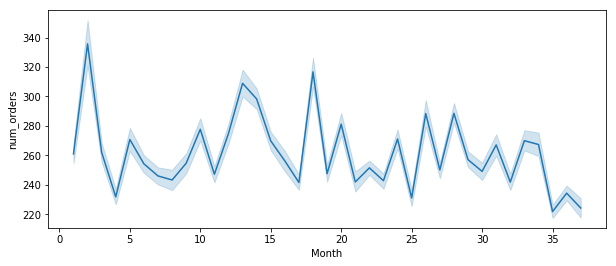

In [34]:
plt.figure(figsize=(10,4))
sns.lineplot(data["Month"],data["num_orders"])

###### week wise analysis based on month

In [35]:
from IPython.html import widgets
from IPython.display import display
from ipywidgets import widgets, interactive
month = widgets.Dropdown(
    options=['All'] + list(data['Month'].unique()),
    value='All',
    description='Month:',
)
def plot(month):
    
    if month=="All":
        plt.figure(figsize=(10,4))
        sns.lineplot(data["week"],data["num_orders"],hue=data["Month"],palette="Set1")
    else:
        p=data[data["Month"]==month]
        plt.figure(figsize=(10,4))
        sns.lineplot(p["week"],p["num_orders"],color="green",label="Month"+str(month))
interactive(plot,month=month)

interactive(children=(Dropdown(description='Month:', options=('All', 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13…

##### <font color='brown'>Month wise analysis based on year</font>

In [36]:
year = widgets.Dropdown(
    options=['All'] + list(data['Year'].unique()),
    value='All',
    description='Year:',
)
def plot(year):
    if year=="All":
        plt.figure(figsize=(10,4))
        plt.grid(True)
        sns.lineplot(data["Month"],data["num_orders"],hue=data["Year"],style=data["Year"],palette="Set1")
    else:
        p=data[data["Year"]==year]
        plt.figure(figsize=(10,4))
        sns.lineplot(p["Month"],p["num_orders"],color="green",label="Year"+str(year))
interactive(plot,year=year)

interactive(children=(Dropdown(description='Year:', options=('All', 1, 2, 3), value='All'), Output()), _dom_cl…

In [37]:
df_last=df.loc[df.groupby(['center_id','meal_id']).week.idxmax()]
df_last=df_last[['meal_id','center_id','num_orders']]
df_last=df_last.rename(columns={'num_orders':'last_order'})
df_last=df_last.reset_index()
df_last.head()

,index,meal_id,center_id,last_order
0,84199,1062,10,958
1,161284,1109,10,1525
2,375292,1198,10,406
3,106128,1207,10,54
4,357216,1216,10,215


In [38]:
df_l3=df[(df['week']==143) | (df['week']==144) | (df['week']==145) ]
df_l3_group=df_l3.groupby(['center_id','meal_id'])['num_orders'].mean()
df_g3=df_l3_group.reset_index()
df_g3=df_g3.rename(columns={'num_orders':'avg_3_orders'})
df_group=df.groupby(['center_id','meal_id'])['num_orders'].mean()
df_group=df_group.reset_index()
df_group=df_group.rename(columns={'num_orders':'avg_orders'})
df_new = pd.merge(data, df_group,  how='left', left_on=['center_id','meal_id'], right_on = ['center_id','meal_id'])
df_new = pd.merge(df_new, df_g3,  how='left', left_on=['center_id','meal_id'], right_on = ['center_id','meal_id'])
df__ = pd.merge(df_new, df_last,  how='left', left_on=['center_id','meal_id'], right_on = ['center_id','meal_id'])
df_new_2 = pd.merge(data1, df_group,  how='left', left_on=['center_id','meal_id'], right_on = ['center_id','meal_id'])
df_new_2 = pd.merge(df_new_2, df_g3,  how='left', left_on=['center_id','meal_id'], right_on = ['center_id','meal_id'])
df_test = pd.merge(df_new_2, df_last,  how='left', left_on=['center_id','meal_id'], right_on = ['center_id','meal_id'])

In [39]:
df_group=df.groupby('center_id')["num_orders"].mean()
df_group=df_group.reset_index()
df_group_1=df_group.rename(columns={'num_orders':'avg_center'})
df__ = pd.merge(df__, df_group_1,  how='left', left_on=['center_id'], right_on = ['center_id'])
df_test = pd.merge(df_test, df_group_1,  how='left', left_on=['center_id'], right_on = ['center_id'])
df_group=df.groupby('meal_id')["num_orders"].mean()
df_group=df_group.reset_index()
df_group_2=df_group.rename(columns={'num_orders':'avg_meal'})
df__ = pd.merge(df__, df_group_2,  how='left', left_on=['meal_id'], right_on = ['meal_id'])
df_test = pd.merge(df_test, df_group_2,  how='left', left_on=['meal_id'], right_on = ['meal_id'])

In [40]:
avg=df['num_orders'].median()
df__=df__.fillna(avg)
df_test=df_test.fillna(avg)
df__['avg_orders'] = df__['avg_orders'].apply(lambda x: round(x))
df_test['avg_3_orders'] = df_test['avg_3_orders'].apply(lambda x: round(x))

In [41]:
df__.columns

Index(['id', 'week', 'center_id', 'meal_id', 'checkout_price', 'base_price',
       'emailer_for_promotion', 'homepage_featured', 'num_orders', 'Month',
       'Year', 'Quarter', 'C', 'ratio', 'Category_check', 'Category_base',
       'category', 'cuisine', 'city_code', 'region_code', 'center_type',
       'op_area', 'avg_orders', 'avg_3_orders', 'index', 'last_order',
       'avg_center', 'avg_meal'],
      dtype='object')

In [42]:
df_test.columns

Index(['id', 'week', 'center_id', 'meal_id', 'checkout_price', 'base_price',
       'emailer_for_promotion', 'homepage_featured', 'Month', 'Year',
       'Quarter', 'C', 'ratio', 'Category_check', 'Category_base', 'category',
       'cuisine', 'city_code', 'region_code', 'center_type', 'op_area',
       'avg_orders', 'avg_3_orders', 'index', 'last_order', 'avg_center',
       'avg_meal'],
      dtype='object')

In [43]:
df__.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,Month,...,city_code,region_code,center_type,op_area,avg_orders,avg_3_orders,index,last_order,avg_center,avg_meal
0,1379560,1,55,1885,136.83,152.29,0,0,177,1,...,647,56,TYPE_C,2.0,230,153.0,11015,121,163.475709,752.456365
1,1018704,2,55,1885,135.83,152.29,0,0,323,1,...,647,56,TYPE_C,2.0,230,153.0,11015,121,163.475709,752.456365
2,1196273,3,55,1885,132.92,133.92,0,0,96,1,...,647,56,TYPE_C,2.0,230,153.0,11015,121,163.475709,752.456365
3,1116527,4,55,1885,135.86,134.86,0,0,163,2,...,647,56,TYPE_C,2.0,230,153.0,11015,121,163.475709,752.456365
4,1343872,5,55,1885,146.50,147.50,0,0,215,2,...,647,56,TYPE_C,2.0,230,153.0,11015,121,163.475709,752.456365


In [44]:
df_test.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,Month,Year,...,city_code,region_code,center_type,op_area,avg_orders,avg_3_orders,index,last_order,avg_center,avg_meal
0,1028232,146,55,1885,158.11,159.11,0,0,37,3,...,647,56,TYPE_C,2.0,230.324138,153,11015.0,121.0,163.475709,752.456365
1,1262649,147,55,1885,159.11,159.11,0,0,37,3,...,647,56,TYPE_C,2.0,230.324138,153,11015.0,121.0,163.475709,752.456365
2,1453211,149,55,1885,157.14,158.14,0,0,38,3,...,647,56,TYPE_C,2.0,230.324138,153,11015.0,121.0,163.475709,752.456365
3,1262599,150,55,1885,159.14,157.14,0,0,38,3,...,647,56,TYPE_C,2.0,230.324138,153,11015.0,121.0,163.475709,752.456365
4,1495848,151,55,1885,160.11,159.11,0,0,38,3,...,647,56,TYPE_C,2.0,230.324138,153,11015.0,121.0,163.475709,752.456365


##### Data Preprocessing 

In [45]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [46]:
df__["cuisine"]=le.fit_transform(df__["cuisine"])
df_test["cuisine"]=le.fit_transform(df_test["cuisine"])
df__["category"]=le.fit_transform(df__["category"])
df_test["category"]=le.fit_transform(df_test["category"])
df__["center_type"]=le.fit_transform(df__["center_type"])
df_test["center_type"]=le.fit_transform(df_test["center_type"])

In [47]:
df_test.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,Month,Year,...,city_code,region_code,center_type,op_area,avg_orders,avg_3_orders,index,last_order,avg_center,avg_meal
0,1028232,146,55,1885,158.11,159.11,0,0,37,3,...,647,56,2,2.0,230.324138,153,11015.0,121.0,163.475709,752.456365
1,1262649,147,55,1885,159.11,159.11,0,0,37,3,...,647,56,2,2.0,230.324138,153,11015.0,121.0,163.475709,752.456365
2,1453211,149,55,1885,157.14,158.14,0,0,38,3,...,647,56,2,2.0,230.324138,153,11015.0,121.0,163.475709,752.456365
3,1262599,150,55,1885,159.14,157.14,0,0,38,3,...,647,56,2,2.0,230.324138,153,11015.0,121.0,163.475709,752.456365
4,1495848,151,55,1885,160.11,159.11,0,0,38,3,...,647,56,2,2.0,230.324138,153,11015.0,121.0,163.475709,752.456365


In [48]:
from sklearn.ensemble import RandomForestRegressor

In [49]:
model=RandomForestRegressor()

In [50]:
df__.columns

Index(['id', 'week', 'center_id', 'meal_id', 'checkout_price', 'base_price',
       'emailer_for_promotion', 'homepage_featured', 'num_orders', 'Month',
       'Year', 'Quarter', 'C', 'ratio', 'Category_check', 'Category_base',
       'category', 'cuisine', 'city_code', 'region_code', 'center_type',
       'op_area', 'avg_orders', 'avg_3_orders', 'index', 'last_order',
       'avg_center', 'avg_meal'],
      dtype='object')

In [51]:
X=df__.iloc[:,[0,1,2,3,4,5,6,7,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27]]
Y=df["num_orders"]

In [52]:
model.fit(X,Y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [53]:
y_p=model.predict(df_test)
y_p

array([1255.8, 1073.9, 1212.3, ...,   64.9,   61.9,   26.9])

##### predicted variables adding as a new attribute in test data

In [54]:
df_test["num_orders"]=y_p

#### analysis on predicted variable of test data
##### week and month ,year wise analysis

In [55]:
month = widgets.Dropdown(
    options=['All'] + list(df_test['Month'].unique()),
    value='All',
    description='Month:',
)
def plot(month):
    
    if month=="All":
        plt.figure(figsize=(10,4))
        sns.lineplot(df_test["week"],df_test["num_orders"],hue=df_test["Month"],palette="Set1")
    else:
        p=df_test[df_test["Month"]==month]
        plt.figure(figsize=(10,4))
        sns.lineplot(p["week"],p["num_orders"],color="green",label="Month"+str(month))
interactive(plot,month=month)

interactive(children=(Dropdown(description='Month:', options=('All', 37, 38, 39), value='All'), Output()), _do…

In [56]:
year = widgets.Dropdown(
    options=['All'] + list(df_test['Year'].unique()),
    value='All',
    description='Year:',
)
def plot(year):
    if year=="All":
        plt.figure(figsize=(10,4))
        plt.grid(True)
        sns.lineplot(df_test["Month"],df_test["num_orders"],hue=df_test["Year"],style=df_test["Year"],palette="Set1")
    else:
        p=df_test[df_test["Year"]==year]
        plt.figure(figsize=(10,4))
        sns.lineplot(p["Month"],p["num_orders"],color="green",label="Year"+str(year))
interactive(plot,year=year)

interactive(children=(Dropdown(description='Year:', options=('All', 3), value='All'), Output()), _dom_classes=…

In [57]:
df_test["num_order"]=y_p
y_p

array([1255.8, 1073.9, 1212.3, ...,   64.9,   61.9,   26.9])

Text(0.5, 1.0, 'Realtion Between Ration and num_orders on Test Data')

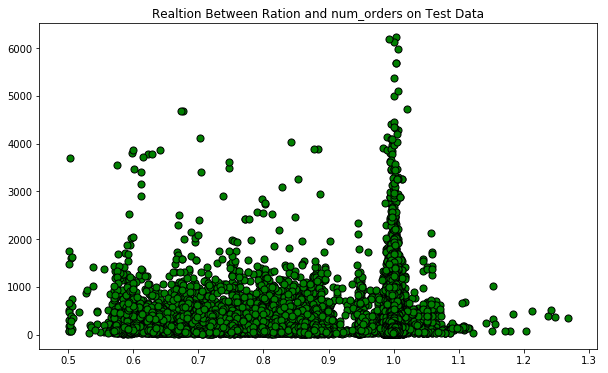

In [58]:
plt.figure(figsize=(10,6))
plt.scatter(df_test['ratio'],df_test["num_order"],marker="o",edgecolors="black",s=50,color="g")
plt.title("Realtion Between Ration and num_orders on Test Data")

In [59]:
df_test.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,Month,Year,...,center_type,op_area,avg_orders,avg_3_orders,index,last_order,avg_center,avg_meal,num_orders,num_order
0,1028232,146,55,1885,158.11,159.11,0,0,37,3,...,2,2.0,230.324138,153,11015.0,121.0,163.475709,752.456365,1255.8,1255.8
1,1262649,147,55,1885,159.11,159.11,0,0,37,3,...,2,2.0,230.324138,153,11015.0,121.0,163.475709,752.456365,1073.9,1073.9
2,1453211,149,55,1885,157.14,158.14,0,0,38,3,...,2,2.0,230.324138,153,11015.0,121.0,163.475709,752.456365,1212.3,1212.3
3,1262599,150,55,1885,159.14,157.14,0,0,38,3,...,2,2.0,230.324138,153,11015.0,121.0,163.475709,752.456365,1025.3,1025.3
4,1495848,151,55,1885,160.11,159.11,0,0,38,3,...,2,2.0,230.324138,153,11015.0,121.0,163.475709,752.456365,1389.3,1389.3


In [60]:
df_test.columns

Index(['id', 'week', 'center_id', 'meal_id', 'checkout_price', 'base_price',
       'emailer_for_promotion', 'homepage_featured', 'Month', 'Year',
       'Quarter', 'C', 'ratio', 'Category_check', 'Category_base', 'category',
       'cuisine', 'city_code', 'region_code', 'center_type', 'op_area',
       'avg_orders', 'avg_3_orders', 'index', 'last_order', 'avg_center',
       'avg_meal', 'num_orders', 'num_order'],
      dtype='object')